In [1]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np


# Problem Parameters
a = -0.5
b = 0.5


def exact(*x):
    return np.prod(np.cos(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2 + 1) * exact(*x)  

In [2]:
# Parameters
d = 1
k = 1
delta = 0.1
Ns = np.linspace(10, 100, 10, dtype=int)

# Computed Parameters
ranges = ((a, b),) * d

# Integration
integrator = rad.integrate.MeanIntegrator(ranges, 2000)
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Data collection
results = np.zeros((np.size(Ns), 2))

for i, N in enumerate(Ns):
    xc = rad.gridn(ranges, N, flat=True)

    # Solve for approximate solution
    solver = rad.solve.GalerkinSolver(d, k, delta, xc, integrator, "helmholtz")
    approx = solver.solve(f)
    error = rad.error(exact, approx, error_integrator)
    cond = solver.cond()
    
    results[i,0] = error 
    results[i, 1] = solver.cond()
    
    print("N:", N)
    print("  L2 Relative Error:", error)
    print("  Condition Number:", solver.cond())

N: 10
  L2 Relative Error: 0.8597771060880893
  Condition Number: 4.336854696011679
N: 20
  L2 Relative Error: 0.4707906739698844
  Condition Number: 214.06973896959437
N: 30
  L2 Relative Error: 1.616954744742852
  Condition Number: 1217.184349394499
N: 40
  L2 Relative Error: 0.5161771000025139
  Condition Number: 784.6120255376547
N: 50
  L2 Relative Error: 0.24688796333004068
  Condition Number: 6242.274922411546
N: 60
  L2 Relative Error: 0.14285541464298995
  Condition Number: 11845.276586770433
N: 70
  L2 Relative Error: 0.09172933701410331
  Condition Number: 47253.63887415098
N: 80
  L2 Relative Error: 0.06738644699825794
  Condition Number: 80989.08699761685
N: 90
  L2 Relative Error: 0.05660994736426542
  Condition Number: 214306.08351270584
N: 100
  L2 Relative Error: 0.052754045797435915
  Condition Number: 341122.1051713184


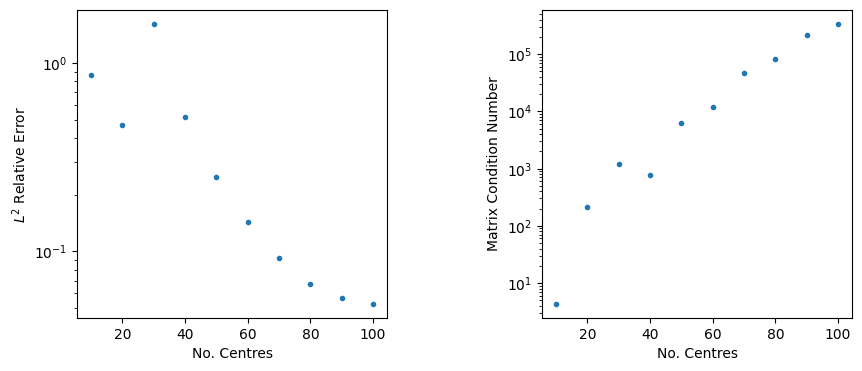

In [3]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 2, figsize=(10,4))

axs[0].set_xlabel("No. Centres")
axs[0].set_ylabel(r"$L^{2}$ Relative Error")
axs[0].set_yscale('log')
axs[0].plot(Ns, results[:, 0], '.')

axs[1].set_xlabel("No. Centres")
axs[1].set_ylabel("Matrix Condition Number")
axs[1].set_yscale('log')
axs[1].plot(Ns, results[:, 1], '.')

plt.subplots_adjust(wspace=0.5)
plt.show()